In [28]:
from pandas import read_csv
import numpy as np

In [29]:
df=read_csv('international-airline-passengers1.csv',usecols=[1])

In [30]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [31]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [32]:
train_size=int(values.shape[0]*0.67)
test_size=values.shape[0]-train_size
train=values[0:train_size]
test=values[train_size:]

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [34]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [35]:
look_back=15
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [36]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(81, 15, 1)

In [37]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [39]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1)





Epoch 1/100





81/81 [==============================] - 1s 9ms/step - loss: 0.0145
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 10/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 11/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 12/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 13/100
81/81 [========

81/81 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 80/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 81/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 82/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 83/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 84/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 85/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 86/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 87/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 88/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 89/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 90/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 91/100
81/81 [=====================

In [44]:
test_pred=model.predict(testX)
test_pred=scaler.inverse_transform(test_pred).ravel()

train_pred=model.predict(trainX)
train_pred=scaler.inverse_transform(train_pred).ravel()

train_true=scaler.inverse_transform([trainY]).ravel()
test_true=scaler.inverse_transform([testY]).ravel()


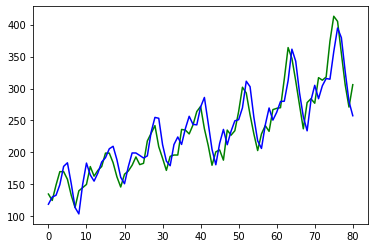

In [46]:
from matplotlib import pyplot as plt
plt.plot(train_true,c='g')
plt.plot(train_pred,c='b')
plt.show()

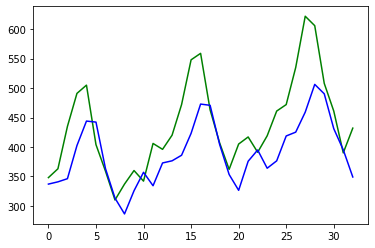

In [47]:
plt.plot(test_true,c='g')
plt.plot(test_pred,c='b')
plt.show()

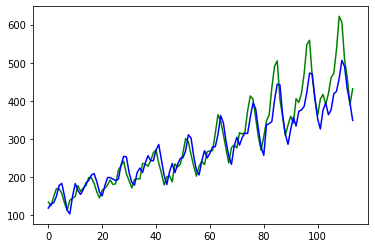

In [49]:
#combining the data
combinedPred=np.concatenate((train_pred,test_pred))
combinedTrue=np.concatenate((train_true,test_true))
plt.plot(combinedTrue,c='g')
plt.plot(combinedPred,c='b')
plt.show()